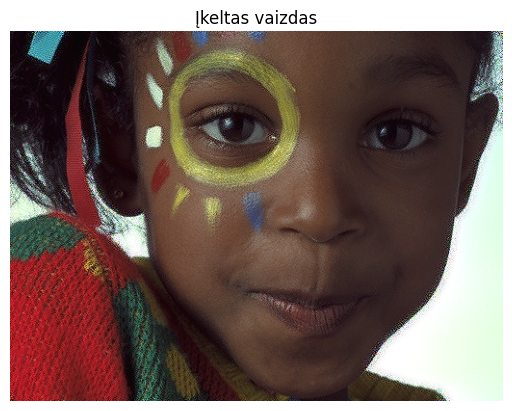

In [37]:
import cv2
import matplotlib.pyplot as plt

def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Nustatykite kelią iki vaizdo
image_path = "C:\\Users\\austeja.rusenaite\\Desktop\\image.bmp"

# Įkelkite vaizdą naudodami OpenCV
img = cv2.imread(image_path)

if img is None:
    print("Nepavyko įkelti vaizdo. Patikrinkite kelią.")
else:
    show_image("Įkeltas vaizdas", img)



## 2. Geometrinės transformacijos
Implementuokite šias funkcijas ir pavaizduokite transformuotus rezultatus:

Pasukimas (Rotation) – pasirinktu kampu naudodami cv2.getRotationMatrix2D   
Mastelio keitimas (Scaling) – padidinimas/sumažinimas naudojant cv2.resize   
Perspektyvos keitimas (Perspective Transform) – naudojant cv2.getPerspectiveTransform   
Atspindys (Flip) – horizontalus ir vertikalus atspindys naudojant cv2.flip   

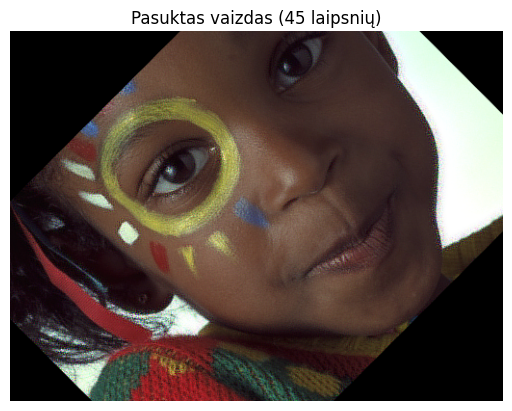

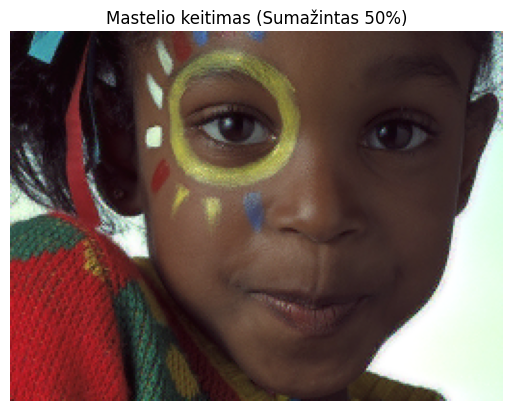

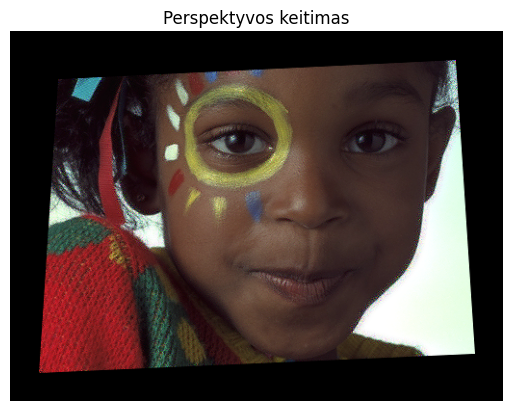

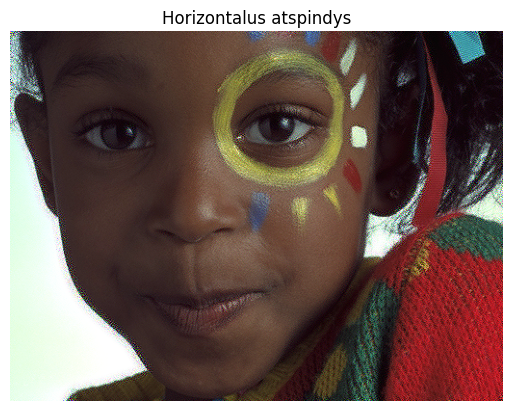

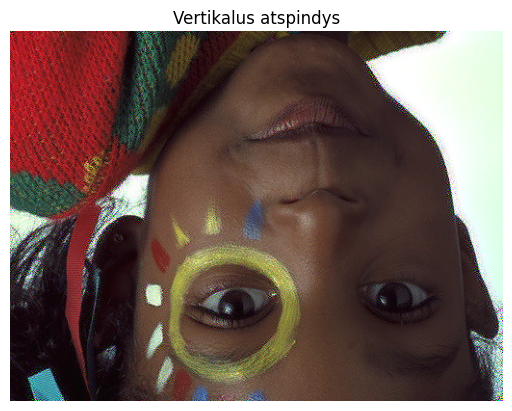

In [38]:
import numpy as np

# Geometrinės transformacijos
# Pasukimas
height, width = img.shape[:2]
center = (width // 2, height // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # Pasukimas 45 laipsniais
rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))
show_image("Pasuktas vaizdas (45 laipsnių)", rotated_img)

# Mastelio keitimas
scaled_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
show_image("Mastelio keitimas (Sumažintas 50%)", scaled_img)

# Perspektyvos keitimas
points_src = np.float32([[0, 0], [width - 1, 0], [0, height - 1], [width - 1, height - 1]])
points_dst = np.float32([[50, 50], [width - 50, 30], [30, height - 30], [width - 30, height - 50]])
perspective_matrix = cv2.getPerspectiveTransform(points_src, points_dst)
warped_img = cv2.warpPerspective(img, perspective_matrix, (width, height))
show_image("Perspektyvos keitimas", warped_img)

# Horizontalus ir vertikalus atspindys
flipped_horizontal = cv2.flip(img, 1)  # Horizontalus
flipped_vertical = cv2.flip(img, 0)  # Vertikalus
show_image("Horizontalus atspindys", flipped_horizontal)
show_image("Vertikalus atspindys", flipped_vertical)

## 3. Filtravimo operacijos
Naudojant OpenCV ir NumPy, įgyvendinkite filtravimo metodus:

Gauso filtravimas (Gaussian Blur) – cv2.GaussianBlur   
Medianinis filtravimas (Median Blur) – cv2.medianBlur

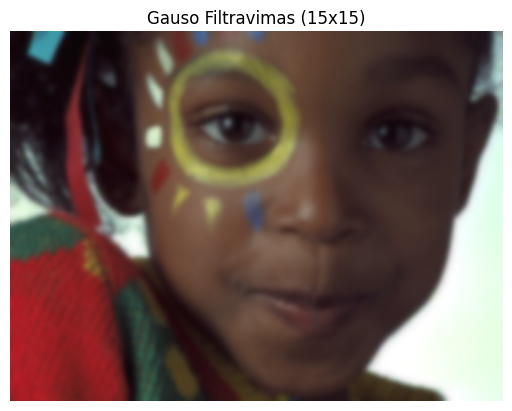

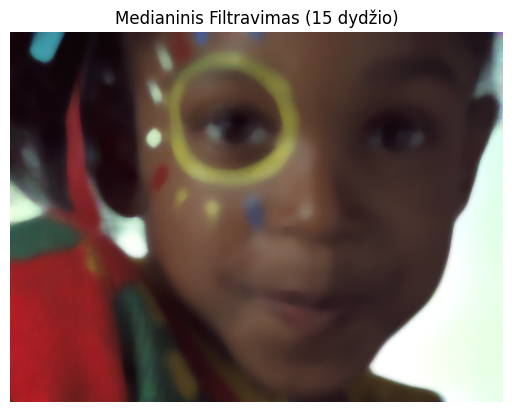

In [39]:
# Gauso filtravimas (Gaussian Blur)
gaussian_blur = cv2.GaussianBlur(img, (15, 15), 0)
show_image("Gauso Filtravimas (15x15)", gaussian_blur)

# Medianinis filtravimas (Median Blur)
median_blur = cv2.medianBlur(img, 15)
show_image("Medianinis Filtravimas (15 dydžio)", median_blur)

## 4. Spalvų transformacijos
Konvertavimas į pilką skalę (Grayscale) – cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
Binarizavimas (Thresholding) – cv2.threshold(img, threshold, maxval, cv2.THRESH_BINARY)
Spalvų keitimas į skirtingas erdves (HSV, LAB) – cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

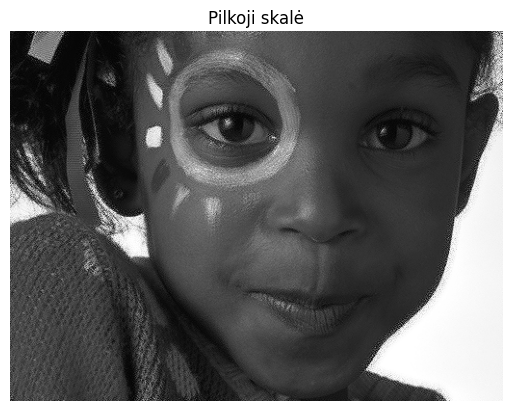

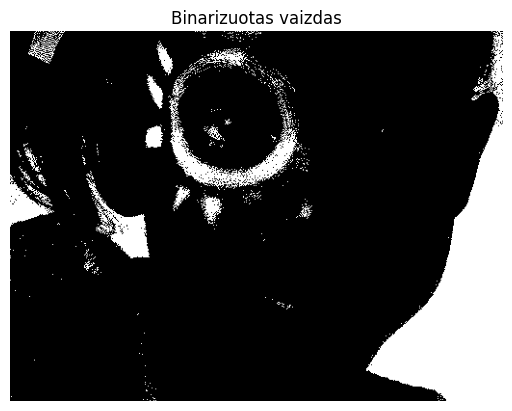

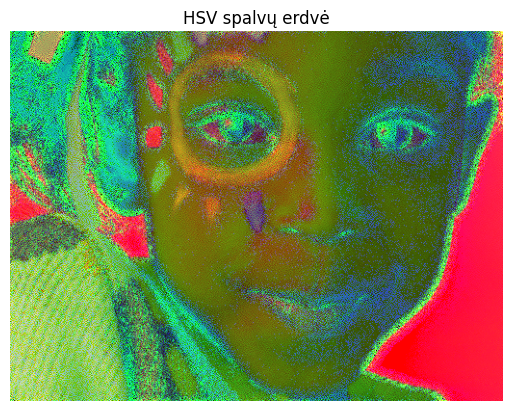

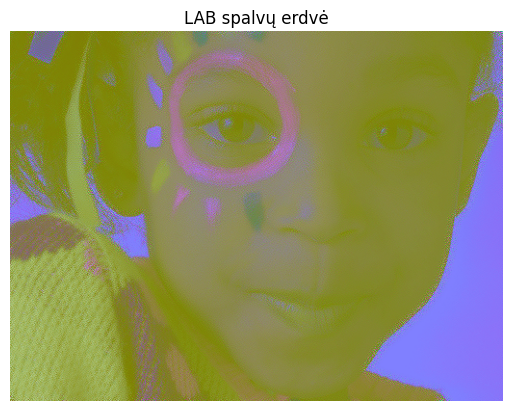

In [40]:
# Konvertavimas į pilką skalę (Grayscale)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_image("Pilkoji skalė", gray_img)

# Binarizavimas (Thresholding)
_, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
show_image("Binarizuotas vaizdas", binary_img)

# Spalvų keitimas į HSV erdvę
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show_image("HSV spalvų erdvė", hsv_img)

# Spalvų keitimas į LAB erdvę
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
show_image("LAB spalvų erdvė", lab_img)


## 5. Interaktyvus įrankis su „Gradio“
Sukurkite įrankį, kuris leis vartotojui įkelti vaizdą ir pasirinkti, kokią transformaciją taikyti:

Pasukimas   
Suliejimas   
Spalvų keitimas   
Kraštų aptikimas   

In [41]:
import cv2
import numpy as np
import gradio as gr

def apply_transformation(image, transformation, param=0):
    # Convert image from BGR to RGB for display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    if transformation == "Pasukimas":
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        matrix = cv2.getRotationMatrix2D(center, param, 1.0)
        result = cv2.warpAffine(image, matrix, (w, h))
        
    elif transformation == "Suliejimas":
        ksize = max(3, int(param)) if param > 0 else 15
        result = cv2.GaussianBlur(image, (ksize, ksize), 0)
        
    elif transformation == "Spalvų keitimas (į pilką)":
        result = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
    elif transformation == "Kraštų aptikimas":
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        result = cv2.Canny(gray, 50, 150)
        
    else:
        result = image
    
    return result

# Gradio interface
gr.Interface(
    fn=apply_transformation,
    inputs=[
        gr.Image(type="numpy"),
        gr.Dropdown(["Pasukimas", "Suliejimas", "Spalvų keitimas (į pilką)", "Kraštų aptikimas"]),
        gr.Slider(0, 360, value=0, label="Parametras (kampas/suliejimo dydis)")
    ],
    outputs=gr.Image(type="numpy"),
    title="Vaizdų Transformacijos Įrankis",
    description="Įkelkite vaizdą ir pasirinkite transformaciją"
).launch()


* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


## 6. Papildomos užduotys (išplėstinės funkcijos)
Sukurti transformacijų grandinę, kur vienas efektas taikomas po kito.   
Naudoti gilaus mokymosi modelį (VGG16 ar ResNet) spalvų perkėlimui ar stiliaus perkėlimui.

In [42]:
# Transformacijų grandinė

def apply_transformation_chain(image, rotate=0, blur_ksize=0, edge_detection=False):
    # Step 1: Rotate Image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, rotate, 1.0)
    result = cv2.warpAffine(image, matrix, (w, h))

    # Step 2: Apply Gaussian Blur
    if blur_ksize > 0:
        result = cv2.GaussianBlur(result, (blur_ksize * 2 + 1, blur_ksize * 2 + 1), 0)

    # Step 3: Edge Detection
    if edge_detection:
        gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        result = cv2.Canny(gray, 50, 150)

    return result


In [43]:
# Stiliaus perkėlimas su VGG

import tensorflow as tf
import tensorflow_hub as hub

def neural_style_transfer(content_image):
    # Load TensorFlow Hub model for style transfer
    model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

    # Preprocess content image for TensorFlow Hub
    content_image = tf.image.convert_image_dtype(content_image, tf.float32)[tf.newaxis, ...]

    # Load a predefined style image or ask user to upload one.
    style_image = np.ones_like(content_image) * [0.5, 0.3, 0.1]  # Placeholder for texture color

    outputs = model(tf.constant(content_image), tf.constant(style_image))
    stylized_image = outputs[0].numpy()
    return stylized_image

In [44]:
gr.Interface(
    fn=lambda img, rotate, blur, edge: apply_transformation_chain(img, rotate, blur, edge),
    inputs=[
        gr.Image(type="numpy"),
        gr.Slider(0, 360, step=1, label="Pasukimas (laipsniai)"),
        gr.Slider(0, 15, step=1, label="Suliejimo dydis"),
        gr.Checkbox(label="Kraštų aptikimas"),
    ],
    outputs=gr.Image(type="numpy"),
    title="Transformacijų Grandinė"
).launch()

* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
